HOUSE PRICING COMPETITION

In [147]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_rows',None)

In [148]:
train_raw = pd.read_csv("data/input/train.csv")
test_raw = pd.read_csv("data/input/test.csv")

In [149]:
train_raw.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [150]:
train_raw.shape

(1460, 81)

In [151]:
print("Train data NaN values:")
print(train_raw.isna().sum())
print("\nTest data NaN values:")
print(test_raw.isna().sum())

Train data NaN values:
Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF 

Text(0.5, 1.0, 'Test data heatmap')

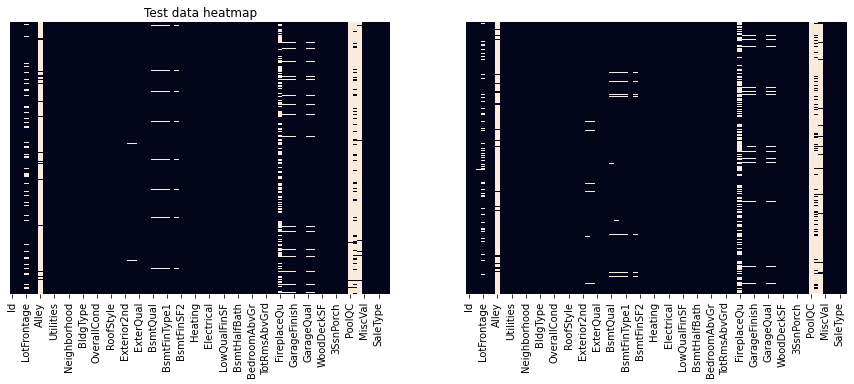

In [152]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)

sns.heatmap(train_raw.isna(), yticklabels=False, cbar=False, ax=axes[0])
axes[0].set_title("Train data heatmap")

sns.heatmap(test_raw.isna(), yticklabels=False, cbar=False, ax=axes[1])
axes[0].set_title("Test data heatmap")

Let us examine types of columns.

In [153]:
print("Feature types in train data:")
print(train_raw.dtypes)

Feature types in train data:
Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        in

Feature types of NaN data.

In [154]:
print("Feature types of NaN in train data:")
print(train_raw.head())
print(train_raw.loc[:, train_raw.isna().any()].head())

Feature types of NaN in train data:
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleConditio

## Feature engineering

Before feature engineering we are going to create to variables train and test to save train_raw and test_raw intact if we needed them somewhere along the analysis.

In [155]:
train = pd.read_csv("data/input/train.csv")
test = pd.read_csv("data/input/test.csv")

Now we generate a function for droping columns with high number of NaN values, as well as high-cardinality columns.

In [156]:
def drop_feature(df, col):
    df.drop([col], axis=1, inplace=True)

In [157]:
cols = ["Id", "Alley", "FireplaceQu", "PoolQC", "Fence", "MiscFeature"]
for col in cols:
    drop_feature(train, col)
    drop_feature(test, col)

In [158]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


After removing features with high number of NaN values we will try to fill other NaN values in train and test data. For categorical variables we will use mode and for numeric variables we will use mean.

In [159]:
def fill_mode(df, col):
    df[col]=df[col].fillna(df[col].mode()[0])

In [160]:
def fill_mean_meadian(df, col, mean_median):
    df[col]=df[col].fillna(df[col].mean_median())

According to our analysis in train data we have 19 columns with NaN values and they are different types. First we will use simple Imputations with mode-categorical variables and mean-numerical variables.

In [190]:

nan_cols_train = [i for i in train.columns if train[i].isnull().any()]
nan_cols_test = [i for i in test.columns if test[i].isnull().any()]

nan_dataset_train = train[nan_cols_train]
nan_dataset_test = train[nan_cols_test]

nan_dataset_train_categorical = nan_dataset_train.loc[:, nan_dataset_train.dtypes == object]
nan_dataset_test_categorical = nan_dataset_test.loc[:,nan_dataset_test.dtypes == object]

nan_dataset_train_numerical = nan_dataset_train.loc[:, nan_dataset_train.dtypes != object]
nan_dataset_test_numerical = nan_dataset_test.loc[:,nan_dataset_test.dtypes != object]
print(nan_dataset_train_numerical.columns)

Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='object')


We will Impute categorical variables of both train and test dataset with mode. 

Numerical variables are going to be imputed with mean.